# Term Structure of Interest Rates Data Tutorial

## Stylized Facts about Short- and Long-Term Interest Rates

We begin by presenting some stylized facts about long and short rates.  In this analysis, we use the 30-day T-bill yield for the short rate and the 20-year Treasury bond yield for the long rate.  Specifically, we will use the FRED series `DGS1MO`, which is the market yield on U.S. Treasury securities at 1-month constant maturity[^1], and `DGS20` which is for 20-year Treasury bonds[^2] [^1]: Bond yields quoted "on an investment basis" means that the YTM is based on the bond's current price relative its par value.  "On a discount basis" expresses yield as a percentage of face value, not the purchase price.  The discount basis is a quicker, but less precise calculation. [2^]: These yields "at constant maturity" is the theoretical yield cased on interpolating the yield curve based on recent values of auctions U.S. Treasury securities.  The 1-month Treasury bill was first introduced in July 2001 in an effort to improve the Treasury's cash management and strengthen market based interest rates.  Prior to 2001, the shortest regular maturities the Treasury issued were 3-month and 6-month bills.  Our longer time horizon analysis alternatively uses the FRED series `TB3MS` for the 3-month T-bill yield.  Data series `DGS20` has missing observations from 1987 to 1993 because <a href="https://www.treasurydirect.gov/research-center/timeline/bonds/?utm_source=chatgpt.com" target="_blank">the US Treasury discontinued regular issues of these bonds in 1986.</a>  

### Visualizing Short- and Long-Term Interest Rates

Let's download the data from FRED and plot the series as well as the long-short spread.  Note that the 1-month Treasury yield and 20-year Treasury yield data are daily, whereas the 3-month T-bill yield is monthly.  The code below converts the the 20-year Treasury yield series to monthly values when looking at the longer time horizon.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')

short_rate = fred.get_series('DGS1MO')
short_rate_alt = fred.get_series('TB3MS')
long_rate = fred.get_series('DGS20')
spread = long_rate-short_rate
spread_alt = long_rate.resample("MS").first()-short_rate_alt

Here is an important note about appropriately converting the 20-year Treasury yields into months.  Since the `DataFrame` `short_rate_alt` and `long_rate` have different frequencies, we cannot simply subtract one from the other to get the spread.  First, we need to convert them to same frequency.  We convert `long_rate` into monthly frequency using the function `DataFrame.resample()`.  This groups the data series into bins of a given time frequency (e.g. using "ME" for months), and then applies an aggregation function to each bin.  The aggregation function could take an average, `DataFrame.resample("ME").mean()`, the last observation in the bin, `DataFrame.resample("ME).last()`, or apply no aggregation, `DataFrame.resample("ME)` (as well as  <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html" target="_blank">other options</a>too ).  In the code above, we take the first observation of each month for `long_rate` so that it matches the frequency of `short_rate_alt`.  The syntax `"MS"` stands for "month start" whereas `"ME"` stands for "month end."

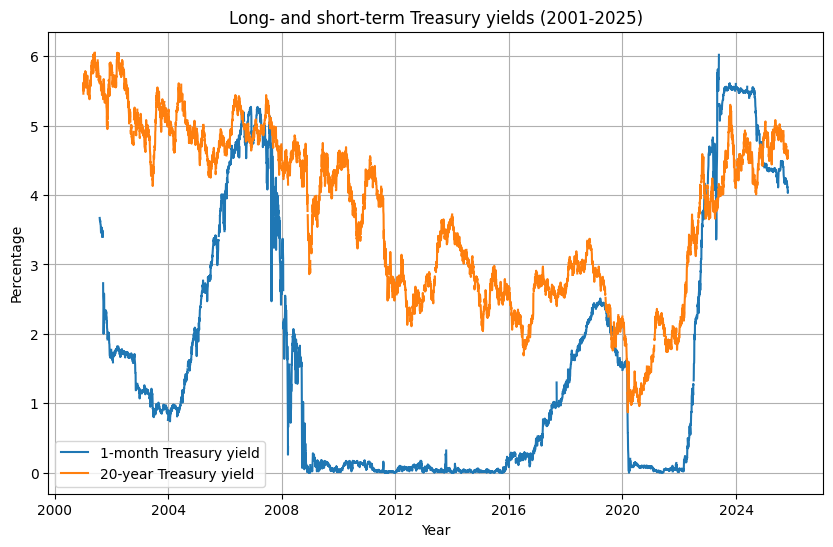

In [2]:
# Plot long- and short-rates
start, end = "2001", "2025"
plt.figure(figsize=(10, 6))

plt.plot(short_rate[start:end], label="1-month Treasury yield")
plt.plot(long_rate[start:end], label="20-year Treasury yield")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Long- and short-term Treasury yields (2001-2025)")
plt.legend()
plt.grid(True)
plt.show()

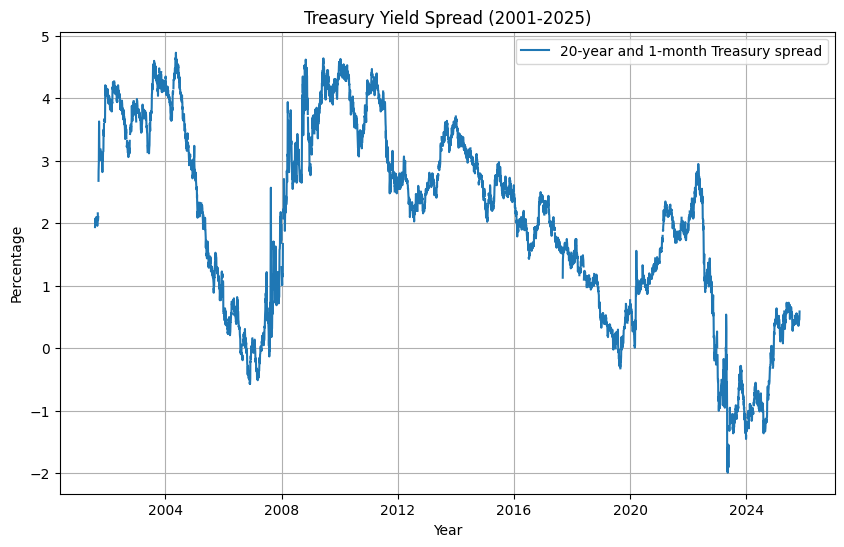

In [3]:
# Plot the long-short spread
start, end = "2001", "2025"
plt.figure(figsize=(10, 6))
plt.plot(spread[start:end], label="20-year and 1-month Treasury spread")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Treasury Yield Spread (2001-2025)")
plt.legend()
plt.grid(True)
plt.show()



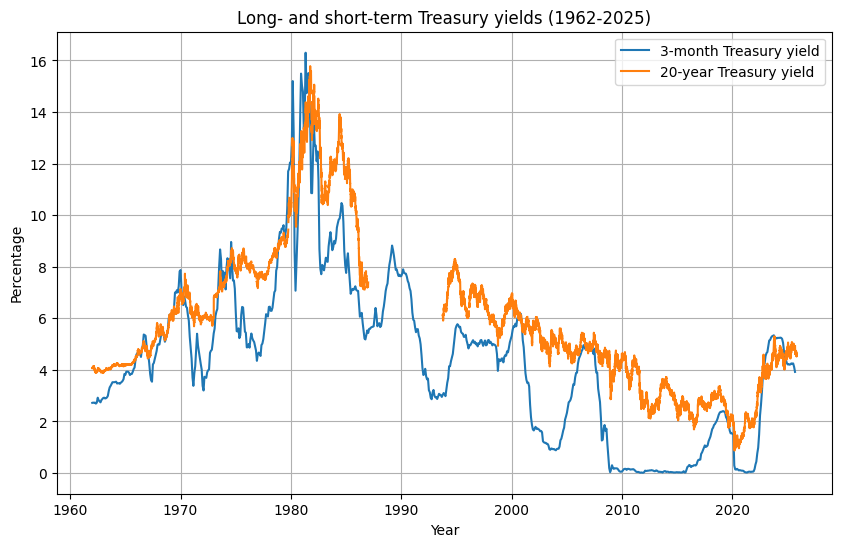

In [4]:
# Plot long- and short-rates
start, end = "1962", "2025"
plt.figure(figsize=(10, 6))

plt.plot(short_rate_alt[start:end], label="3-month Treasury yield")
plt.plot(long_rate[start:end], label="20-year Treasury yield")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Long- and short-term Treasury yields (1962-2025)")
plt.legend()
plt.grid(True)
plt.show()

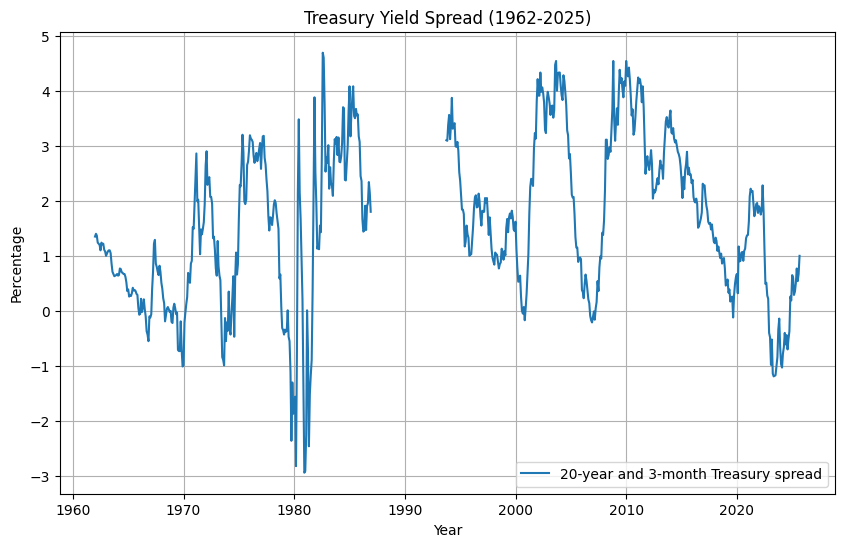

In [5]:
# Plot the long-short spread
start, end = "1962", "2025"
plt.figure(figsize=(10, 6))
plt.plot(spread_alt[start:end], label="20-year and 3-month Treasury spread")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Treasury Yield Spread (1962-2025)")
plt.legend()
plt.grid(True)
plt.show()

Casual observation of the figures above suggest that the levels of short- and long-rates vary substantially over time.  The short- and long- rate averaged three percent and four percent, respectively, in the 1960s; then peaked to around 15 percent in the early 1980s; then fell gradually to near zero and 3 percent in the 2010s.  Such variation suggest there exist persistent macroeconomic factors which affect these rates.

It is also striking that short- and long-rates tend to move in tandem.  Although there are short-term deviations--particularly when the short-rate falls quickly--the two rates strongly comove over the entire sample.  

The spread appears much less variable than the levels of the short- and long-rates.  This is consistent with the levels exhibiting strong comovement.  

We can perform some basic statistical tests of the data series to validate our casual observations and delve a bit deeper into their patterns.  Let's begin with some descriptive statistics to characterize the mean and variance of the data series.

In [6]:
# Descriptive statistics for full sample

print("Descriptive Statistics for 1-month T-bill rate", short_rate.describe())
print("Descriptive Statistics for 3-month T-bill rate", short_rate_alt.describe())
print("Descriptive Statistics for 20-year T-bond rate", long_rate.describe())
print("Descriptive Statistics for spread", spread.describe())
print("Descriptive Statistics for spread back to 1960", spread_alt.describe())

print("Coefficient of variation for 1-month T-bill rate", short_rate.mean()/short_rate.std())
print("Coefficient of variation for 3-month T-bill rate", short_rate_alt.mean()/short_rate_alt.std())
print("Coefficient of variation for 20-year T-bill rate", long_rate.mean()/long_rate.std())
print("Coefficient of variation for spread", spread.mean()/spread.std())
print("Coefficient of variation for spread back to 1960", spread_alt.mean()/spread_alt.std())

Descriptive Statistics for 1-month T-bill rate count    6065.000000
mean        1.647899
std         1.830514
min         0.000000
25%         0.070000
50%         0.970000
75%         2.600000
max         6.020000
dtype: float64
Descriptive Statistics for 3-month T-bill rate count    1101.000000
mean        3.416966
std         3.099861
min         0.010000
25%         0.380000
50%         2.930000
75%         5.220000
max        16.300000
dtype: float64
Descriptive Statistics for 20-year T-bond rate count    14254.000000
mean         5.860652
std          2.845283
min          0.870000
25%          4.050000
50%          5.255000
75%          7.270000
max         15.780000
dtype: float64
Descriptive Statistics for spread count    6065.000000
mean        2.036015
std         1.542738
min        -1.990000
25%         0.860000
50%         2.200000
75%         3.310000
max         4.730000
dtype: float64
Descriptive Statistics for spread back to 1960 count    684.000000
mean       1.59276

Based on these statistics we can confirm that indeed the short-term interest rate is less volatile than the long-term interest rate.  It's coefficient of correlation is nearly half.  It also has similar volatility as the spread.  Interestingly, the volatility of all series seems to increase over the more recent history.

Now we look at comovement of the series

In [7]:
print("Coefficient of correlation for 3-month and 20-year Treasury yields", short_rate_alt.corr(long_rate))
print("Coefficient of correlation for 1-month and 20-year Treasury yields", short_rate.corr(long_rate))

Coefficient of correlation for 3-month and 20-year Treasury yields 0.8975584311404085
Coefficient of correlation for 1-month and 20-year Treasury yields 0.5484284640814442


Over the longer time horizon the short-rate and long rate have correlation of 0.90 showing that, indeed, the two series strongly comove.  Over the shorter time horizon, from 2001-2025, the correlation is noticeable weaker at 0.55 suggesting that whatever factor is responsible for moving both series has weakened.  This is consistent with the spread being 2.04 percent for the 2001-2025 period compared to 1.59 for the 1960-2025 period.

### Testing for Stationarity of the Short- and Long-Term Rates

No let's delve into deeper patterns of the data.  First, let's investigate whether the series are stationary in first differences.  A data series is stationary if it's mean, variance, and covariance are independent of time.[^3] [^3]: Technically this is the definition for weak-form stationarity, but it is a sufficient condition for the analysis performed here.  Besides providing an interesting description of the data, stationarity is a necessary assumption for many time series statistical analysis, such as forecasting.  

You can begin to guess whether or not a time series is stationary by casual inspection.  Does it exhibit a constant mean?  If so, the level of the variable plotted over time should appear to have no trend or structural breaks.  Does it exhibit constant variance? If so, the amplitude of the variable plotted over time should appear relatively constant.  Does it exhibit constant covariance?  If so, the length of a cycle, or frequency, should appear constant over time.  

As discussed above, the levels of the short- and long-rate do not appear stationary.  For example, we noted that the means of the data series exhibited clear trends which suggested some macro factor simultaneously affecting both.  We also found that the coefficient of variation differed across the recent two decades compared to the the past six decades; so it seems the series variance is not independent of time either.  

Since we want stationarity for statistical analysis, we need to manipulate our data series so that it becomes stationary.  One simple way of doing this is taking first differences: create a new time series by taking the level at time $t$ and subsracting its level at time $t-1$. That is, take the difference of the original data series with its lag.  This procedure reduces the trend.  Let's take first-differences of our data and see what it looks like.

`Pandas` provides a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html" target="_blank">function</a> `DataFrame.diff()` which does first differencing.

In [8]:
# Take first differences
short_rate_diff=short_rate.diff()
short_rate_alt_diff=short_rate_alt.diff()
long_rate_diff=long_rate.diff()
spread_diff=spread.diff()
spread_alt_diff=spread_alt.diff()

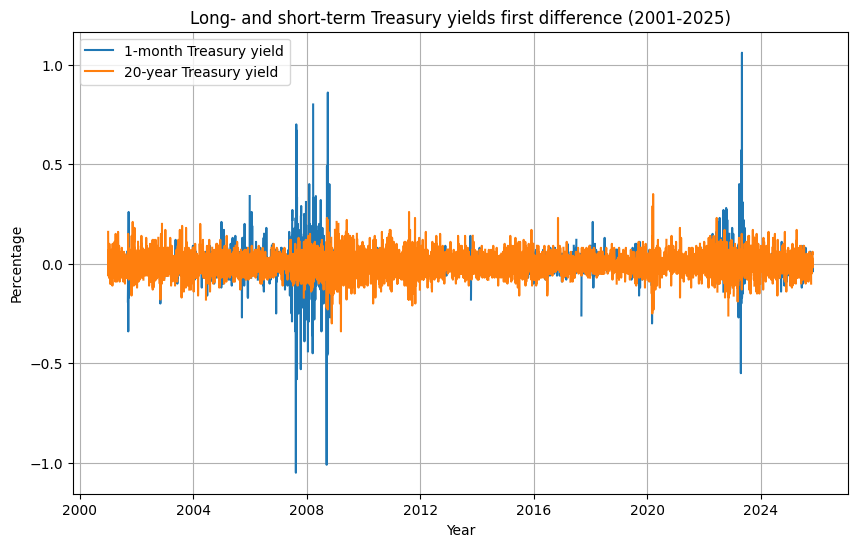

In [9]:
# Plot the first differenced series
start, end = "2001", "2025"
plt.figure(figsize=(10, 6))

plt.plot(short_rate_diff[start:end], label="1-month Treasury yield")
plt.plot(long_rate_diff[start:end], label="20-year Treasury yield")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Long- and short-term Treasury yields first difference (2001-2025)")
plt.legend()
plt.grid(True)
plt.show()

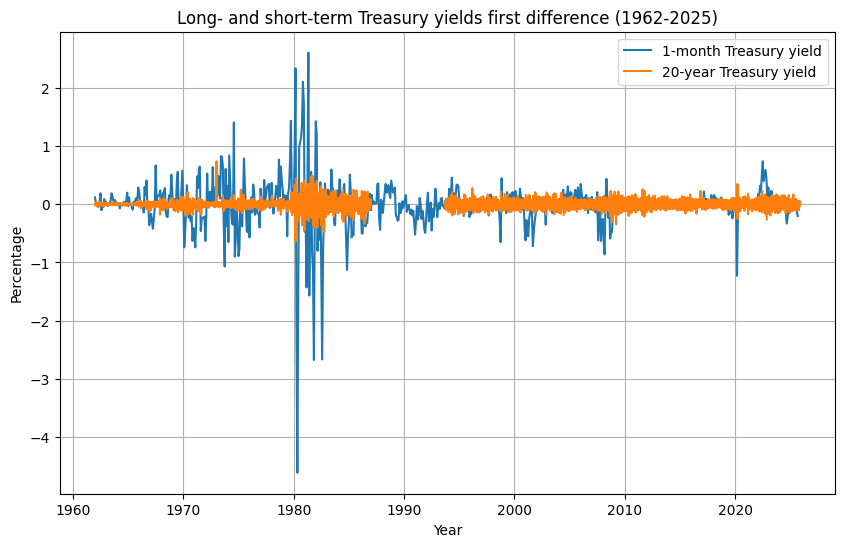

In [10]:
# Plot the first differenced series
start, end = "1962", "2025"
plt.figure(figsize=(10, 6))

plt.plot(short_rate_alt_diff[start:end], label="1-month Treasury yield")
plt.plot(long_rate_diff[start:end], label="20-year Treasury yield")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Long- and short-term Treasury yields first difference (1962-2025)")
plt.legend()
plt.grid(True)
plt.show()

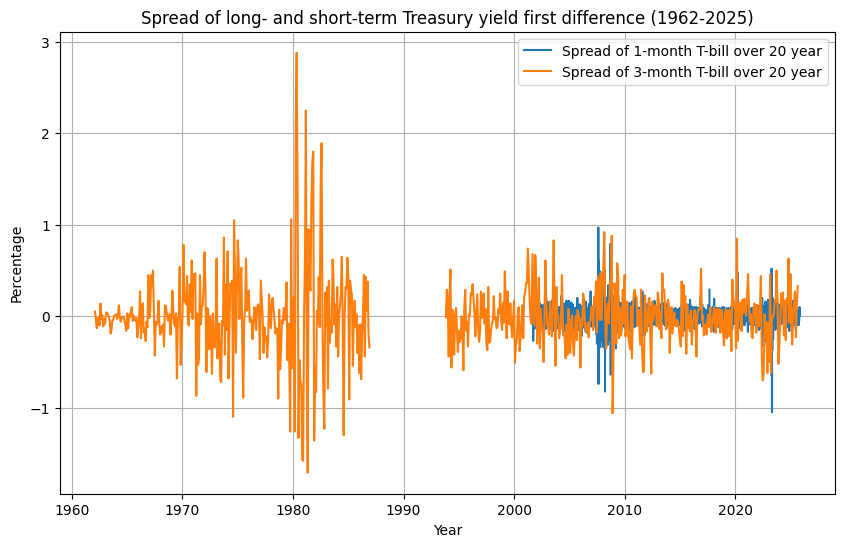

In [11]:
# Plot the first differenced series
start, end = "1962", "2025"
plt.figure(figsize=(10, 6))

plt.plot(spread_diff[start:end], label="Spread of 1-month T-bill over 20 year")
plt.plot(spread_alt_diff[start:end], label="Spread of 3-month T-bill over 20 year")

# Title the figure and label the axis
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Spread of long- and short-term Treasury yield first difference (1962-2025)")
plt.legend()
plt.grid(True)
plt.show()

These series appear noticeably more stationary.  Although there is a spike in volatility in the 1980s and 2008 in the short-rate, the mean is now nearly constant around zero.

Now, we perform some parametric statistical tests to see whether or not our series are indeed stationary.  We will use the Augmented Dickey-Fuller (ADF) test: test the null hypothesis that a unit root is present in an autoregressive model of a time series.  The ADF tests calculate a test statistic, and the p-value associated with this statistic measures the strength of evidence against the null hypothesis. If the p-value is less than a chosen significance level (commonly set at 0.05), you reject the null hypothesis in favor of the alternative hypothesis concluding the time series as stationary.

Compared to the Dickey-Fuller test, which only uses a simple first-order autoregressive model, the *Augmented* Dickey-Fuller (ADF) test uses a higher-order autogressive process that includes lagged differences to account for higher-order serial correlation.  Specifically, it uses the model

$$
\Delta y_t = a_0+a_1 t+a_3 y_{t-1}+\sum_{i} \delta_i \Delta y_{t-i}+\epsilon_t
$$

where $a_1$ is a constant, $a_1$ is the coefficient on a time trend, and $p$ is the lag order of the AR process.  The null hypothesis of the ADF tes is $H_0:a_3=0$ which means there exists a unit root.  There are three different types of ADF tests depending on whether you suspect that time series has a time trend or drift:
1. Setting $a_0=a_1=0$ assumes no time trend and no drift
2. Setting $a_1=0$ assumes no time trend, but allows drift since $a_0 \neq 0$
3. Allowing $a_0 \neq 0$ and $a_1 \neq 0$ allows both a time trend and drift

Which version of the test you use depends on the prior knowledge of the time series and affects the size and power of the test.  Based on our graphs above, the first-differenced series exhibit no time trend or drift so we can run the test assuming $a_0=a_1=0$.  

Fortunately, the Python library `statsmodels` provides a <a href="https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html" target="_blank">function</a> called `adfuller` which performs the ADF test.  The function takes a time series as its input and allows for the specification of the number of lags using the `maxlags` parameter or automatic selection via the `autolag` parameter, with `autolag="AIC"` being a recommended approach as it selects the optimal lag length by minimizing the Akaike Information Criterion (AIC).  It also allows you to specify which of the three tests to run with the parameter `regression`;  where `regression="c"` includes only a constant ($a_0$), `regression="ct"` includes a constant and linear trend ($a_0+a_1 t$), and `regression="n"` includes no constant or trend.  The function outputs the ADF test statistic, the p-value, the number of lags used, the number of observations, and the critical values at different significance levels (1%,5%,10%).  

Let's perform the test on our short- and long-rates.  Before doing so, however, we should do some data cleaning:
- Let's transform all data into a monthly frequency.  In this tutorial we are more interested in macroeconomic relationships rather than high frequency dynamics.  Thus it is more appropriate to run our statistical tests on monthly data.  Once all our time series on monthly, then we proceed to the ADF test.
- Since the 20-year Treasury yield series has missing data from 1987 to 1993, we need to run two ADF tests on data prior to 1987 and after 1993.  The ADF test in Python requires a clean numeric array with no missing observations.

We will use the default parameter `regression="c"` which does not include a time trend.  Whether to include a trend term in the ADF regression depends on prior beliefs about the deterministic properties of the data.  That is, could the series plausibly have a deterministic trend in its mean over time?  An example of a macroeconomic series which very likely has a deterministic trend is GDP or the CPI price level.  GDP tends to grow over time due to productivity growth while the price level grows due to growth in money supply.  For short- and long-term Treasury yields, there is no clear deterministic trend.  Their mean levels shifts with monetary policy regimes and inflation expectations, but not in a smooth time trend.  This is also clear by visual inspection of the series above.

Also, we will first run the ADF on the monthly series in *levels*.  This may seem strange because casual inspection suggests the series are all non-stationary, but we will learn something from the results...

In [12]:
# Convert all time series to monthly frequency

long_rate_m=long_rate.resample("MS").first()
short_rate_m=short_rate.resample("MS").first()
short_rate_alt_m=short_rate_alt.resample("MS").first()
spread_alt_m=long_rate_m-short_rate_alt_m

# Create two continuous periods of data on the 20-year yield

long_rate_m_cont_1987=long_rate_m.loc[:"1987-01-01"].dropna()
long_rate_m_cont_1993=long_rate_m.loc["1987-09-01":].dropna()

# Only use the 20-year and 3-month spread for convenience
# Using the 20-year 1 month spread requires more data cleaning

spread_alt_m_cont_1987=spread_alt_m.loc[:"1987-01-01"].dropna()
spread_alt_m_cont_1993=spread_alt_m.loc["1987-09-01":].dropna()

In [13]:
# Import the statsmodels library

from statsmodels.tsa.stattools import adfuller

# Write a function so that the output from the adfuller function is easier to read

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Perform the ADF test
print("ADF test for the long-rate post-1993", adf_test(long_rate_m_cont_1993))
print("ADF test for the long-rate pre-1987", adf_test(long_rate_m_cont_1987))
print("ADF test for the short-rate 1-month yield", adf_test(short_rate_m))
print("ADF test for the short-rate 3-month yield", adf_test(short_rate_alt_m))
print("ADF test for the spread post-1993", adf_test(spread_alt_m_cont_1993))
print("ADF test for the spread pre-1987", adf_test(spread_alt_m_cont_1987))

Results of Dickey-Fuller Test:
Test Statistic                  -1.674189
p-value                          0.444458
#Lags Used                       0.000000
Number of Observations Used    384.000000
Critical Value (1%)             -3.447495
Critical Value (5%)             -2.869096
Critical Value (10%)            -2.570795
dtype: float64
ADF test for the long-rate post-1993 None
Results of Dickey-Fuller Test:
Test Statistic                  -1.467534
p-value                          0.549506
#Lags Used                       1.000000
Number of Observations Used    298.000000
Critical Value (1%)             -3.452486
Critical Value (5%)             -2.871288
Critical Value (10%)            -2.571964
dtype: float64
ADF test for the long-rate pre-1987 None
Results of Dickey-Fuller Test:
Test Statistic                  -3.193203
p-value                          0.020382
#Lags Used                      12.000000
Number of Observations Used    279.000000
Critical Value (1%)             -3.454

Here is how to interpret the output of the ADF test.  Let's focus on the long-rate post-1993 as an example.  The p-value is 0.4444 is not less than 0.05, so we fail to reject the null hypothesis.  This means that the long-rate post-1993 is non-stationary.

Surprisingly, the 1-month Treasury yield and the 20-year over 3-month Treasury spread are found to be stationary.  This contradicts our intuition and prior knowledge about the behavior of these series.  We know that monetary policy systematically alters the mean levels of short-term rates in coincidence with the business cycle.  The core issue is that the ADF assumes that any non-stationarity comes from a **stochastic trend**.  It does not handle structural breaks, policy regime shifts, or time-varying means well.  Our 1-month T-bill yield, for example, doesn't look nonstationarity because of a random walk--it looks nonstationary because of **regime changes.**  Each regime, representing monetary policy, has its own "mean level" around which short-term rates fluctuate.  The ADF test is not designed to detect that kind of nonstationarity, so it can misleadingly find stationarity because within each regime, the short rate fluctuates around a temporary mean.

There is a related problem with evaluating the stationarity of short-rates using the ADF test.  Notice that the `adfuller` test chose a lag length of 12 for the 1-month yield, whereas it chose 0 lags for the 20-year rate post-1993 and 1 lag for pre-1987.  The reason is that the lagged differences ($\Delta y_{t-i}$) serve to remove serial correlation that could bias the test.  Although the AIC already balances goodness of fit (measured by SSR) with model complexity (measured by the number of parameters), it chooses a long lag length for the short-rate because the short-rate's dynamics are much more serially correlated, while the long rate's aren't.  That’s perfectly plausible economically: short-term rates move more smoothly and have stronger autocorrelation because of how the Fed targets the short end.  Additionally, the AIC penalizes complexity lightly compared to BIC, so it often chooses fairly long lag lengths where there is serial correlation.  If the true data-generating process is highly persistent, but stationary, AIC may overfit small noise patterns in short samples which can cause the ADF test to find spurious stationarity.

To illustrate the fragility of the ADF test on our short-rate, let's rerun the test on the 1-month yield with only 4 lags instead of 12:

In [14]:
# Import the statsmodels library

from statsmodels.tsa.stattools import adfuller

# Write a function so that the output from the adfuller function is easier to read

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, maxlag=4, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Perform the ADF test

print("ADF test for the short-rate 1-month yield", adf_test(short_rate_m))

Results of Dickey-Fuller Test:
Test Statistic                  -1.937003
p-value                          0.314859
#Lags Used                       4.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64
ADF test for the short-rate 1-month yield None


Now, indeed, the p-value of 0.31 is larger than 0.05 so that the series is nonstationary.  Because the test result flips quite easily, it likely means that the 1-month yield is highly persistent but not strictly unit-root nonstationary.  This is a somewhat will known finding: short-term rates tend to be near unit root but mildly mean-reverting (especially pre-2008).  Economically, this is not surprising: the short-rate drifts with monetary policy regimes but exhibits some mean reversion.

With 12 lags, the model is absorbing a lot of serial correlation in the short-run dynamics of the $\Delta y_{t}$.  This makes the test statistic on $y_{t-1}$ more negative (from -1.94 to -3.19) because the residuals are "cleaner" and the regression attributes less of the persistence to the error term.  Using only 4 lags leaves some autocorrelation unmodeled, so the regression attributes more of the persistence to $y_{t-1}$, making it look closer to a unit root.

Let's delve a bit deeper.  Although a tad tedious, we can better understand the behavior of the short-rate by performing a few more diagnostic tests.  We will check the degree to which the 4-lag model versus the 12-lag model handles serial correlation in the data.  Specifically, we will collect the residuals from the ADF regression and then observe their autocorrelation function (ACF) and partial autocorrelation function (PACF) as well as formerly test whether the residuals are white-noise or not.  We use the <a href="https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html" target="_blank">Ljung-Box test</a>, performed with the function `acorr-ljungbox` from `statsmodels`, to check if there exists serial correlation in the residuals.  The ACF shows the correlation between the series with a lagged version of itself while the PACF shows the additional (marginal) correlation explained by each successive lagged term.  These provide visual evidence of whether or not our residuals exhibit any serial correlation.

Below we do the following:
1. Explicitly write the ADF regression to extract the residuals in the variable called `resid`.  We use 4 lags in the regression.
2. Perform the Ljung-Box test on the residuals.  If the p-value > 0.05, the residuals are approximately white noise.
3. Plot the ACF and PCF using the functions `plot_acf` and `plot_pacf` from `statsmodels`.
4. Repeat steps 1-3 with a lag length of 12.

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Focus on the 1-month Treasury yield
y = short_rate_m.dropna()

# Choose the number of lags
n_lags = 4 

# Build the ADF regression manually: Δy_t = α + β*y_{t-1} + Σγ_i*Δy_{t-i} + ε_t
y_diff = y.diff().dropna()
y_lagged = y.shift(1).dropna()
X = pd.concat([y_lagged, pd.concat([y_diff.shift(i) for i in range(1, n_lags+1)], axis=1)], axis=1).dropna()
X.columns = ["y_lag1"] + [f"dy_lag{i}" for i in range(1, n_lags+1)]
y_reg = y_diff.loc[X.index]

X = sm.add_constant(X)
model = sm.OLS(y_reg, X).fit()
resid = model.resid

In [16]:
# Ljung–Box test up to 12 lags
lb_test = acorr_ljungbox(resid, lags=[12], return_df=True) # Test whether residual autocorrelation up to lag 12 is jointly zero.  Common for monthly data.
print(lb_test)

      lb_stat  lb_pvalue
12  20.681852   0.055238


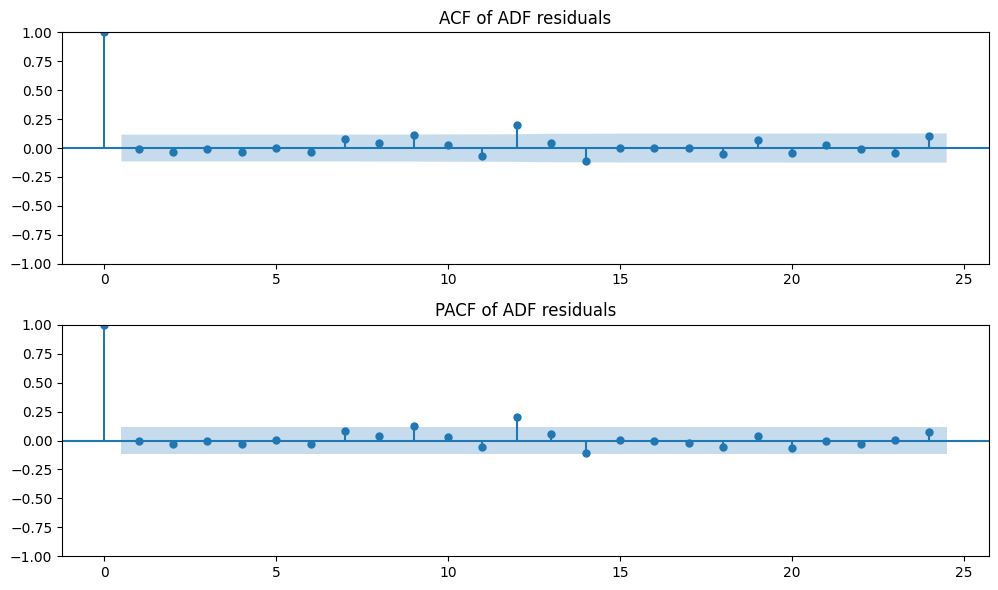

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10,6))
plot_acf(resid, lags=24, ax=ax[0])
ax[0].set_title("ACF of ADF residuals")
plot_pacf(resid, lags=24, ax=ax[1])
ax[1].set_title("PACF of ADF residuals")
plt.tight_layout()
plt.show()

Since the p-value of the Ljung-Box test is 0.055, which is > 0.05, we conclude that the residuals are approximately white noise.  Therefore, the 4 lag specification is adequate to handle the serial correlation in the 1-month yield.  The ACF and PACF plots show that there is virtually no serial correlation in the residuals.

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Let's pick the series you want to test
y = short_rate_m.dropna()

# Choose the number of lags
n_lags = 12  # or 12 for comparison

# Build the ADF regression manually: Δy_t = α + β*y_{t-1} + Σγ_i*Δy_{t-i} + ε_t
y_diff = y.diff().dropna()
y_lagged = y.shift(1).dropna()
X = pd.concat([y_lagged, pd.concat([y_diff.shift(i) for i in range(1, n_lags+1)], axis=1)], axis=1).dropna()
X.columns = ["y_lag1"] + [f"dy_lag{i}" for i in range(1, n_lags+1)]
y_reg = y_diff.loc[X.index]
# Add constant
X = sm.add_constant(X)
model = sm.OLS(y_reg, X).fit()
resid = model.resid

# --- Print results ---
print(model.summary())

# or, if you only want the R² and key stats:
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
print(f"t-statistic: {model.tvalues['y_lag1']:.3f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5.895
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           1.40e-09
Time:                        09:19:53   Log-Likelihood:                 45.866
No. Observations:                 279   AIC:                            -63.73
Df Residuals:                     265   BIC:                            -12.89
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.018      2.390      0.0

In [19]:
# Ljung–Box test up to 12 lags
lb_test = acorr_ljungbox(resid, lags=[12], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
12  0.731443   0.999998


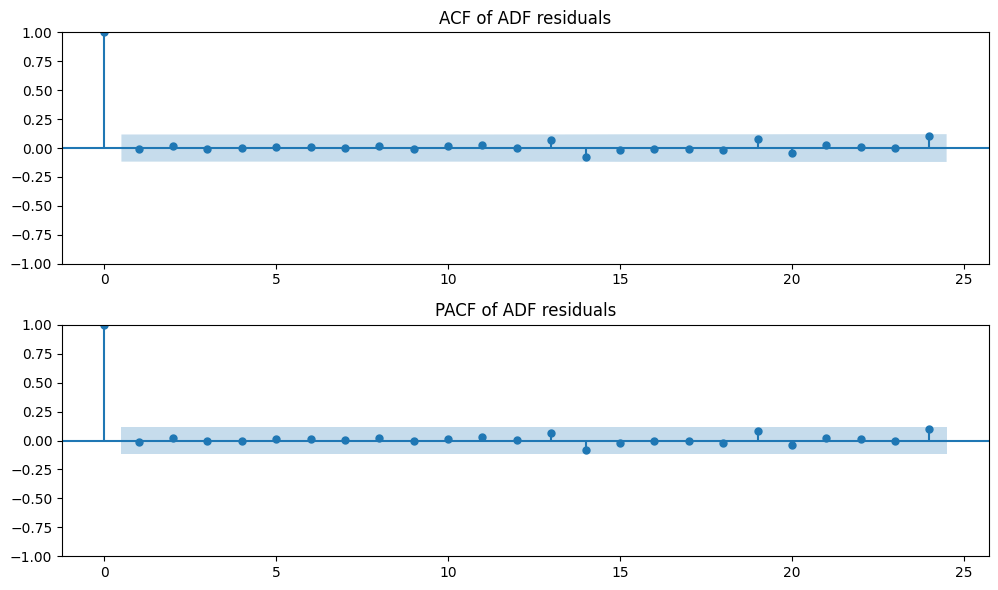

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10,6))
plot_acf(resid, lags=24, ax=ax[0])
ax[0].set_title("ACF of ADF residuals")
plot_pacf(resid, lags=24, ax=ax[1])
ax[1].set_title("PACF of ADF residuals")
plt.tight_layout()
plt.show()

Unsurprisingly, the 12-lag structure handles more of the serial correlation as suggested by a p-value of the Ljung-Box test of 0.99 and even less serial correlation displayed in the ACF and PACF plots.  However, we saw that the 4-lag structure was enough to sufficiently handle the serial correlation in the 1-month yield.  Therefore, the 12 lag specification may indeed be overfitting.  As mentioned, this is due to the AIC's relatively weak penalizing of complexity.

If the 4-lag structure is adequate, then we can more confidently trust the results of the ADF test with 4 lags, which claimed that the 1-month yield was nonstationary.  This is consistent with our intuition about the behavior of the time series.  

Although cumbersome, this process provides compelling evidence that the 1-month yield displays near-unit-root behavior and motivates us to first-difference the series to be more confident in our statistical tests.  It is well known that short-term rates exhibit high autocorrelation compared to long-rates, and this result is often stated as, "long-rate changes are less predictable that short-rate changes."  More evidence of the this can be found by observing the R-squared from the ADF regression.  Above, we saw that R-squared of the short-rate ADF test was 0.224, and below we find that it is 0.013 for the long-rate ADF test.  Changes in the long-rate accounts for only 1.3 percent of its variance, while changes in the short-rate account for about 22.4 percent of its variance.

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Let's pick the series you want to test
y = long_rate_m.dropna()

# Choose the number of lags
n_lags = 4  # or 12 for comparison

# Build the ADF regression manually: Δy_t = α + β*y_{t-1} + Σγ_i*Δy_{t-i} + ε_t
y_diff = y.diff().dropna()
y_lagged = y.shift(1).dropna()
X = pd.concat([y_lagged, pd.concat([y_diff.shift(i) for i in range(1, n_lags+1)], axis=1)], axis=1).dropna()
X.columns = ["y_lag1"] + [f"dy_lag{i}" for i in range(1, n_lags+1)]
y_reg = y_diff.loc[X.index]
# Add constant
X = sm.add_constant(X)
model = sm.OLS(y_reg, X).fit()
resid = model.resid

# --- Print results ---
print(model.summary())

# or, if you only want the R² and key stats:
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
print(f"t-statistic: {model.tvalues['y_lag1']:.3f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.797
Date:                Sat, 01 Nov 2025   Prob (F-statistic):              0.111
Time:                        09:19:53   Log-Likelihood:                -148.14
No. Observations:                 680   AIC:                             308.3
Df Residuals:                     674   BIC:                             335.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0359      0.027      1.356      0.1

Since we are taking both the long- and short-rates as being non-stationary, the spread may either be nonstationary or stationary.  If the spread is stationary, then the long-term and short-term rates are cointegrated.  Although I omit the analysis here, the results of the ADF test on the spread are very sensitive in a similar way as the we saw with the 1-month Treasury yield, suggesting it may be a near unit root process.  However, there is also the technical issue that the ADF test on the spread assumes that the cointegrating vector is $(1,-1)$, since we construct the spread by simply taking $\text{spread}_t = \text{long-rate}_t-\text{short-rate}_t$.  If, however, the term premium is not constant over time, then this simple test may give misleading results.  A more robust approach is to use the Engle-Granger test which does not assume the cointegrating vector is $(1,-1)$.  Instead, it regresses $\text{long-rate}_t=\alpha+\beta \text{short-rate}_t + u_$, then runs the ADF test on the residuals $\hat{u}_t$.  If $\hat{u}_t$ is stationary, then the long- and short-rates are cointegrated.  

Rather than construct the residuals ourselves, we run the <a href="https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html" target="_blank">Engle-Granger cointegration test</a> using the function `coint` from `statsmodels`.  This function takes two data series as its inputs and returns a t-statistic and p-value of the unit root test on the residuals.  The Null hypothesis is that there is no cointegration, so if the p-value is below the critical value then we conclude there is a cointegrating relationship. 

Below we 

In [22]:
# Create two continuous periods of data with the same size on the 20-year yield and 3 month yield

short_rate_alt_m_cont_1987=short_rate_alt_m.loc["1962-01-01":"1986-12-01"]
short_rate_alt_m_cont_1993=short_rate_alt_m.loc["1993-10-01":]
long_rate_m_cont_1987=long_rate_m.loc[:"1987-01-01"].dropna()
long_rate_m_cont_1993=long_rate_m.loc["1987-09-01":"2025-09-01"].dropna()

# Also prepare data to test the spread on the 1 month yield
long_rate_m_cont_2001=short_rate_m.loc["2001-07-01":]

In [23]:
from statsmodels.tsa.stattools import coint

coint_t_1987, p_value_1987, _ = coint(long_rate_m_cont_1987, short_rate_alt_m_cont_1987)
coint_t_1993, p_value_1993, _ = coint(long_rate_m_cont_1993, short_rate_alt_m_cont_1993)

print(f"Engle–Granger test statistic for pre-1987: {coint_t_1987:.3f}, p-value: {p_value_1987:.4f}")
print(f"Engle–Granger test statistic for post-1993: {coint_t_1993:.3f}, p-value: {p_value_1993:.4f}")

Engle–Granger test statistic for pre-1987: -3.577, p-value: 0.0262
Engle–Granger test statistic for post-1993: -2.433, p-value: 0.3092


Interestingly, the results on the Engle-Granger test conclude that the short- and long-rates were cointegrated before 1987, but not cointegrated after 1993.  This likely reflects structural changes in the term premium and monetary policy regimes.  The period post-1993 includes the Great Moderation, QE, ZLB, and big changes in term premia--so its not so surprising that cointegration is not found here.

These results show a nuanced picture of the relationship between long- and short-rates.  Although the rates tend to comove before 1987, that comovements is not stastically significant after 1993.  Visual inspection of the two series suggests something changed after 2000, when the short-rate became much more volatile relative to the long-rate.  Another way of saying this is that we cannot reject the hypothesis that the spread is non-stationary after 1993.  Term premium become very volatility.  